In [40]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

peleduy ru
bluff nz
hermanus za
olinda br
pevek ru
caravelas br
yar-sale ru
sentyabrskiy ru
rio gallegos ar
xiongyue cn
ushuaia ar
poum nc
barentsburg sj
college us
bredasdorp za
aswan eg
agadez ne
arraial do cabo br
osmanabad in
kruisfontein za
hobart au
albany au
faya td
ushuaia ar
butaritari ki
lavrentiya ru
iranshahr ir
nizhneyansk ru
rocha uy
vanimo pg
tuktoyaktuk ca
leningradskiy ru
mataura pf
nabire id
hermanus za
belushya guba ru
port hardy ca
upernavik gl
hermanus za
bandarbeyla so
hilo us
petropavlovsk-kamchatskiy ru
avera pf
adrar dz
puerto ayora ec
klaksvik fo
chelmza pl
avarua ck
ramnagar in
halalo wf
rikitea pf
micheweni tz
nome us
eureka us
presidente medici br
rikitea pf
leh in
leningradskiy ru
shache cn
katsuura jp
cherskiy ru
atuona pf
tirano it
severo-kurilsk ru
colares pt
tabou ci
iqaluit ca
katsuura jp
komsomolskiy ru
nikolskoye ru
los llanos de aridane es
saskylakh ru
palabuhanratu id
avera pf
karauzyak uz
soyo ao
pangoa pe
mocuba mz
port lincoln au
geraldton au
m

belyy yar ru
faanui pf
saskylakh ru
bandarbeyla so
ponta do sol cv
camden us
penzance gb
staryy nadym ru
new norfolk au
saskylakh ru
rikitea pf
rikitea pf
kapaa us
kleck by
rikitea pf
katsuura jp
nanortalik gl
iqaluit ca
ushuaia ar
bluff nz
grand river south east mu
timra se
belushya guba ru
taolanaro mg
gorontalo id
bredasdorp za
victoria sc
willmar us
praia cv
punta arenas cl
north bend us
bhatkal in
khatanga ru
mataura pf
bage br
ponta do sol cv
amderma ru
bredasdorp za
hithadhoo mv
cape town za
barrow us
punta arenas cl
hermanus za
albany au
illoqqortoormiut gl
jamestown sh
inhambane mz
amapa br
gora pl
beringovskiy ru
thompson ca
jinchang cn
lata sb
grand river south east mu
thompson ca
sungairaya id
east london za
kavaratti in
belushya guba ru
araxa br
pevek ru
kieta pg
busselton au
san jeronimo mx
punta arenas cl
rikitea pf
new norfolk au
chernushka ru
saint anthony ca
gualaquiza ec
qaanaaq gl
palabuhanratu id
souillac mu
nerchinskiy zavod ru
mukhen ru
tuktoyaktuk ca
punta arena

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [18]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | peleduy
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | olinda
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | caravelas
Processing Record 7 of Set 1 | yar-sale
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | rio gallegos
Processing Record 10 of Set 1 | xiongyue
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | poum
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | aswan
Processing Record 17 of Set 1 | agadez
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | osmanabad
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 

Processing Record 33 of Set 4 | mutsamudu
City not found. Skipping...
Processing Record 34 of Set 4 | padang
Processing Record 35 of Set 4 | vitim
Processing Record 36 of Set 4 | kosh-agach
Processing Record 37 of Set 4 | spremberg
Processing Record 38 of Set 4 | kamenka
Processing Record 39 of Set 4 | isangel
Processing Record 40 of Set 4 | qaanaaq
Processing Record 41 of Set 4 | ilhabela
Processing Record 42 of Set 4 | nyakahanga
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | nuuk
Processing Record 45 of Set 4 | lufilufi
Processing Record 46 of Set 4 | burica
City not found. Skipping...
Processing Record 47 of Set 4 | vaini
Processing Record 48 of Set 4 | abbeville
Processing Record 49 of Set 4 | paragominas
Processing Record 50 of Set 4 | hithadhoo
Processing Record 1 of Set 5 | ahipara
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | grand centre
City not found. Skipping...
Processing Record 4 of Set 5 | noyabrsk
Processing Record 5 of 

Processing Record 23 of Set 8 | ola
Processing Record 24 of Set 8 | general pico
Processing Record 25 of Set 8 | fagersta
Processing Record 26 of Set 8 | gigmoto
Processing Record 27 of Set 8 | katikati
Processing Record 28 of Set 8 | srednekolymsk
Processing Record 29 of Set 8 | mergui
City not found. Skipping...
Processing Record 30 of Set 8 | boatlaname
City not found. Skipping...
Processing Record 31 of Set 8 | blankenberge
Processing Record 32 of Set 8 | sistranda
Processing Record 33 of Set 8 | cabo san lucas
Processing Record 34 of Set 8 | iracoubo
Processing Record 35 of Set 8 | juneau
Processing Record 36 of Set 8 | alamos
Processing Record 37 of Set 8 | san patricio
Processing Record 38 of Set 8 | ghansor
Processing Record 39 of Set 8 | yirol
City not found. Skipping...
Processing Record 40 of Set 8 | ambon
Processing Record 41 of Set 8 | glace bay
Processing Record 42 of Set 8 | lahij
Processing Record 43 of Set 8 | bulungu
Processing Record 44 of Set 8 | san ramon
Processin

Processing Record 10 of Set 12 | thilogne
City not found. Skipping...
Processing Record 11 of Set 12 | bandarban
Processing Record 12 of Set 12 | laguna
Processing Record 13 of Set 12 | tongliao
Processing Record 14 of Set 12 | muravlenko
Processing Record 15 of Set 12 | funadhoo
Processing Record 16 of Set 12 | saint-augustin
Processing Record 17 of Set 12 | agirish
Processing Record 18 of Set 12 | gladstone
Processing Record 19 of Set 12 | walvis bay
Processing Record 20 of Set 12 | acapulco
Processing Record 21 of Set 12 | makakilo city
Processing Record 22 of Set 12 | la ronge
Processing Record 23 of Set 12 | catamarca
Processing Record 24 of Set 12 | iskateley
Processing Record 25 of Set 12 | havelock
Processing Record 26 of Set 12 | cangzhou
Processing Record 27 of Set 12 | arraias
Processing Record 28 of Set 12 | khonuu
City not found. Skipping...
Processing Record 29 of Set 12 | salitrillo
Processing Record 30 of Set 12 | luderitz
Processing Record 31 of Set 12 | acari
Processi

In [19]:
len(city_data)

543

In [21]:
city_data

[{'City': 'Peleduy',
  'Lat': 59.6289,
  'Lng': 112.7406,
  'Max Temp': 78.15,
  'Humidity': 27,
  'Cloudiness': 91,
  'Wind Speed': 14.63,
  'Country': 'RU',
  'Date': '2021-08-01 05:10:44'},
 {'City': 'Bluff',
  'Lat': -46.6,
  'Lng': 168.3333,
  'Max Temp': 48.79,
  'Humidity': 91,
  'Cloudiness': 93,
  'Wind Speed': 2.3,
  'Country': 'NZ',
  'Date': '2021-08-01 05:10:44'},
 {'City': 'Hermanus',
  'Lat': -34.4187,
  'Lng': 19.2345,
  'Max Temp': 54.81,
  'Humidity': 84,
  'Cloudiness': 62,
  'Wind Speed': 9.62,
  'Country': 'ZA',
  'Date': '2021-08-01 05:10:45'},
 {'City': 'Olinda',
  'Lat': -8.0089,
  'Lng': -34.8553,
  'Max Temp': 74.93,
  'Humidity': 78,
  'Cloudiness': 75,
  'Wind Speed': 19.57,
  'Country': 'BR',
  'Date': '2021-08-01 05:07:58'},
 {'City': 'Pevek',
  'Lat': 69.7008,
  'Lng': 170.3133,
  'Max Temp': 35.98,
  'Humidity': 80,
  'Cloudiness': 93,
  'Wind Speed': 23.44,
  'Country': 'RU',
  'Date': '2021-08-01 05:10:45'},
 {'City': 'Caravelas',
  'Lat': -17.7125,
  

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Peleduy,59.6289,112.7406,78.15,27,91,14.63,RU,2021-08-01 05:10:44
1,Bluff,-46.6000,168.3333,48.79,91,93,2.30,NZ,2021-08-01 05:10:44
2,Hermanus,-34.4187,19.2345,54.81,84,62,9.62,ZA,2021-08-01 05:10:45
3,Olinda,-8.0089,-34.8553,74.93,78,75,19.57,BR,2021-08-01 05:07:58
4,Pevek,69.7008,170.3133,35.98,80,93,23.44,RU,2021-08-01 05:10:45
5,Caravelas,-17.7125,-39.2481,67.50,75,80,12.62,BR,2021-08-01 05:10:45
6,Yar-Sale,66.8333,70.8333,59.45,57,96,11.52,RU,2021-08-01 05:10:46
7,Rio Gallegos,-51.6226,-69.2181,39.54,66,90,16.89,AR,2021-08-01 05:10:46
8,Xiongyue,40.1774,122.1228,78.28,83,95,3.87,CN,2021-08-01 05:10:47
9,Ushuaia,-54.8000,-68.3000,46.06,49,40,25.32,AR,2021-08-01 05:10:47


In [28]:
new_city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
new_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Peleduy,RU,2021-08-01 05:10:44,59.6289,112.7406,78.15,27,91,14.63
1,Bluff,NZ,2021-08-01 05:10:44,-46.6000,168.3333,48.79,91,93,2.30
2,Hermanus,ZA,2021-08-01 05:10:45,-34.4187,19.2345,54.81,84,62,9.62
3,Olinda,BR,2021-08-01 05:07:58,-8.0089,-34.8553,74.93,78,75,19.57
4,Pevek,RU,2021-08-01 05:10:45,69.7008,170.3133,35.98,80,93,23.44


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

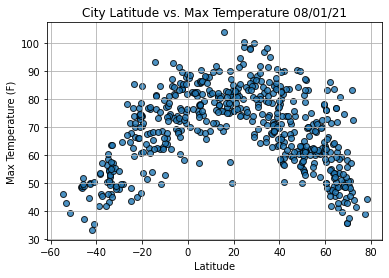

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

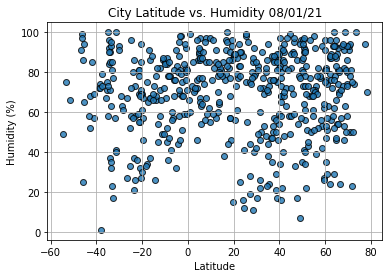

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

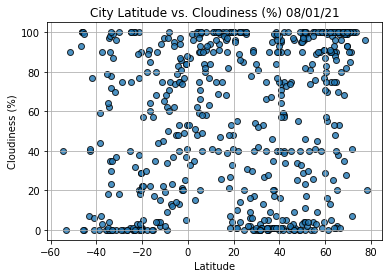

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

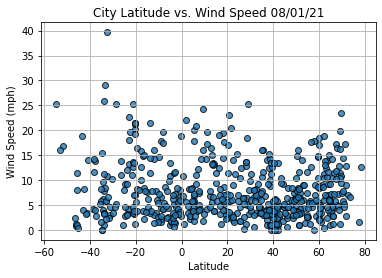

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

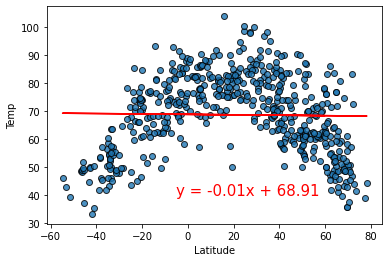

In [51]:
# Perform linear regression on Max Temperature.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-5,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

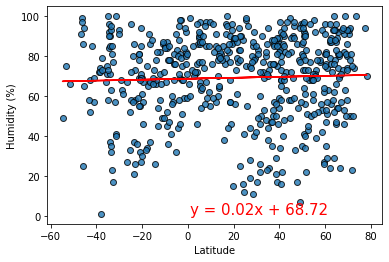

In [49]:
# Perform linear regression on Humidity.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, humidity)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (1,1), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

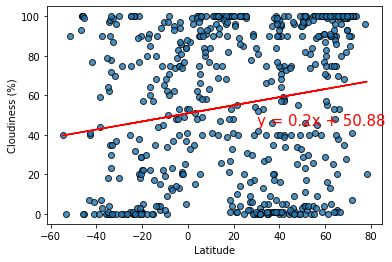

In [52]:
# Perform linear regression on Cloudiness.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (30,45), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

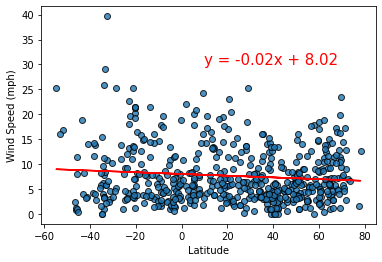

In [53]:
# Perform linear regression on wind_speed.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [104]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [105]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [114]:
northern_hemi_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

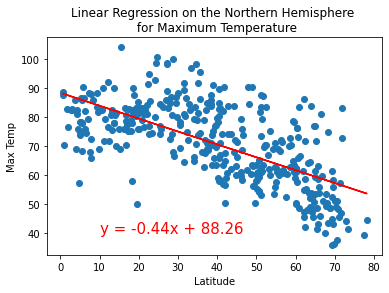

In [111]:
# Linear regression on the Northern Hemisphere and Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Northern Hemisphere \n for Maximum Temperature'),
                       'Max Temp',(10,40))

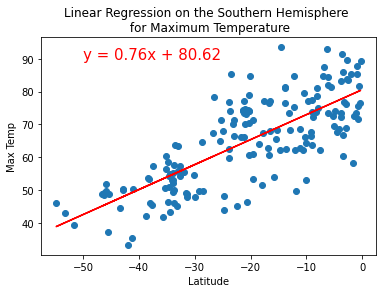

In [112]:
# Linear regression on the Southern Hemisphere and Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, plt.title("Linear Regression on the Southern Hemisphere \n for Maximum Temperature"),
                       "Max Temp",(-50,90))

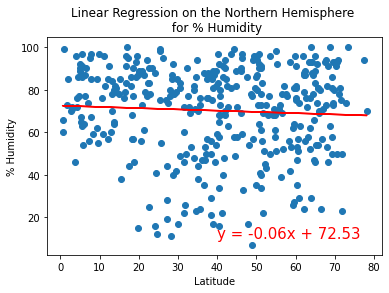

In [120]:
# Linear regression on the Northern Hemisphere and Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Northern Hemisphere \n for % Humidity'),
                       '% Humidity',(40,10))

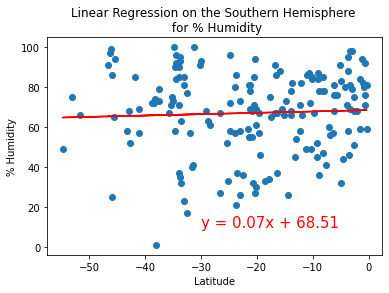

In [122]:
# Linear regression on the Southern Hemisphere and Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere \n for % Humidity'),
                       '% Humidity',(-30,10))

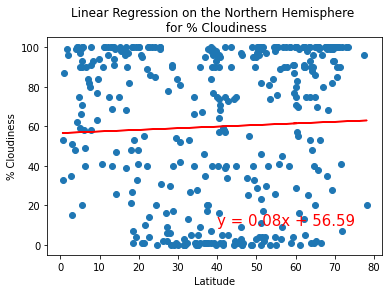

In [123]:
# Linear regression on the Northern Hemisphere and Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Northern Hemisphere \n for % Cloudiness'),
                       '% Cloudiness',(40,10))

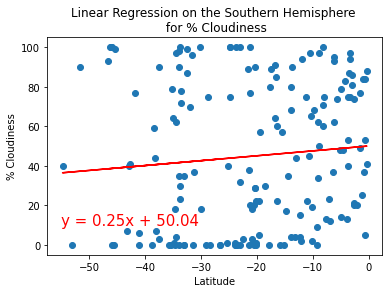

In [125]:
# Linear regression on the Southern Hemisphere and Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere \n for % Cloudiness'),
                       '% Cloudiness',(-55,10))

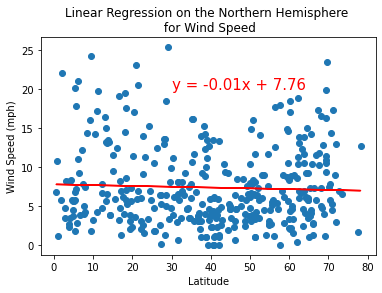

In [129]:
# Linear regression on the Northern Hemisphere and Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Northern Hemisphere \n for Wind Speed'),
                       'Wind Speed (mph)',(30,20))

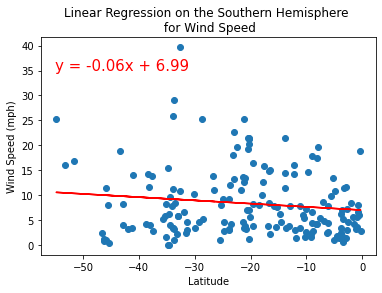

In [130]:
# Linear regression on the Southern Hemisphere and Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere \n for Wind Speed'),
                       'Wind Speed (mph)',(-55,35))